In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
import seaborn as sns

### Import input file with features

In [13]:
data = pd.read_csv("../../pan-genomics/data/e_faecium/aac_dpc_tpc/update/RR/e_faecium_RR_AAC_DPC_TPC_final.txt", sep="\t",index_col=0)
data.head()

,A,C,D,E,F,G,H,I,K,L,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
#,,,,,,,,,,,,,,,,,,,,,
fig|1104325.3.peg.384|ABC;RR,0.045045,0.000000,0.090090,0.063063,0.036036,0.040541,0.009009,0.090090,0.072072,0.144144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
fig|1104325.3.peg.408|Predicted;RR,0.028926,0.008264,0.061983,0.095041,0.041322,0.028926,0.033058,0.136364,0.095041,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
fig|1104325.3.peg.485|ABC;RR,0.031250,0.004464,0.066964,0.089286,0.044643,0.049107,0.013393,0.107143,0.053571,0.098214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004505,0.0
fig|1104325.3.peg.571|Predicted;RR,0.028455,0.004065,0.052846,0.069106,0.056911,0.032520,0.028455,0.126016,0.097561,0.101626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
fig|1104325.3.peg.888|PhoP,0.038462,0.000000,0.094017,0.089744,0.047009,0.047009,0.017094,0.081197,0.076923,0.106838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


#### Transpose table

In [14]:
data1 = data
data1=data1.transpose()
data1.head()

#,fig|1104325.3.peg.384|ABC;RR,fig|1104325.3.peg.408|Predicted;RR,fig|1104325.3.peg.485|ABC;RR,fig|1104325.3.peg.571|Predicted;RR,fig|1104325.3.peg.888|PhoP,fig|1104325.3.peg.942|YclJ,fig|1104325.3.peg.1090|Predicted;HK,fig|1104325.3.peg.1222|LiaR/VraR,fig|1104325.3.peg.1292|PhoP,fig|1104325.3.peg.1501|DcuR,...,fig|791161.5.peg.1205|Predicted;RR,fig|791161.5.peg.1371|PhoP,fig|791161.5.peg.1478|CiaR,fig|791161.5.peg.1615|ABC;RR,fig|791161.5.peg.1643|Predicted;RR,fig|791161.5.peg.1692|PhoP,fig|791161.5.peg.1954|Predicted;HK,fig|791161.5.peg.2067|YesN,fig|791161.5.peg.2359|OmpR;RR,fig|791161.5.peg.2406|OmpR;RR
A,0.045045,0.028926,0.031250,0.028455,0.038462,0.058824,0.043825,0.085714,0.052632,0.042194,...,0.033898,0.042735,0.072650,0.040541,0.024793,0.052632,0.064103,0.037422,0.069869,0.057377
C,0.000000,0.008264,0.004464,0.004065,0.000000,0.000000,0.005976,0.000000,0.004386,0.008439,...,0.008475,0.000000,0.000000,0.000000,0.008264,0.004386,0.000000,0.004158,0.000000,0.008197
D,0.090090,0.061983,0.066964,0.052846,0.094017,0.084034,0.053785,0.061905,0.070175,0.059072,...,0.063559,0.094017,0.076923,0.090090,0.057851,0.065789,0.038462,0.051975,0.078603,0.081967
E,0.063063,0.095041,0.089286,0.069106,0.089744,0.088235,0.081673,0.119048,0.100877,0.071730,...,0.063559,0.089744,0.111111,0.063063,0.103306,0.105263,0.064103,0.112266,0.087336,0.073770
F,0.036036,0.041322,0.044643,0.056911,0.047009,0.050420,0.073705,0.014286,0.008772,0.050633,...,0.080508,0.047009,0.021368,0.036036,0.041322,0.008772,0.076923,0.051975,0.017467,0.053279


In [15]:
pca = PCA()
pca = PCA()

df_weights = pd.DataFrame(pca.fit_transform(data1.dropna().T), index=data1.dropna().columns)

df_weights

,0,1,2,3,4,5,6,7,8,9,...,7348,7349,7350,7351,7352,7353,7354,7355,7356,7357
#,,,,,,,,,,,,,,,,,,,,,
fig|1104325.3.peg.384|ABC;RR,-0.010387,-0.031539,0.026991,0.023403,0.063997,-0.040921,-0.008893,-0.021152,0.021924,-0.019765,...,-1.987048e-274,2.009933e-274,-3.754338e-275,-2.245356e-17,-1.197914e-17,-1.348484e-17,-7.567316e-18,-1.358870e-17,1.298223e-17,-9.300968e-18
fig|1104325.3.peg.408|Predicted;RR,0.057271,0.056791,-0.016844,0.006769,0.020140,0.009844,0.011459,0.052716,-0.002469,-0.012781,...,3.478883e-34,1.477874e-34,-1.335533e-34,1.910775e-18,4.318586e-20,5.688333e-19,-2.256345e-19,-3.342356e-19,-4.439650e-20,9.949839e-20
fig|1104325.3.peg.485|ABC;RR,0.006747,0.037552,0.049675,-0.056464,0.008100,-0.037953,-0.024955,0.007439,-0.000608,0.038023,...,-5.703637e-34,-5.691817e-35,-1.220907e-34,-3.409124e-19,-5.599944e-19,1.706403e-19,-6.161068e-20,-4.263683e-20,6.639574e-20,-7.092971e-20
fig|1104325.3.peg.571|Predicted;RR,0.084786,0.028229,0.026503,-0.002201,-0.013166,0.031836,-0.020491,-0.043654,-0.024626,-0.025843,...,1.305512e-34,-8.860541e-35,-5.892783e-35,5.970409e-19,-8.593094e-20,3.519416e-19,-2.042698e-19,-8.820347e-20,9.810691e-20,6.342512e-20
fig|1104325.3.peg.888|PhoP,-0.034253,-0.015387,-0.019761,-0.031495,0.050420,0.029954,0.018935,-0.025927,0.018295,-0.008718,...,-1.023836e-34,-3.708419e-34,-1.108337e-34,-1.226026e-19,-5.260178e-19,-4.084319e-19,2.364664e-19,2.583304e-19,-1.986751e-19,7.492964e-21
fig|1104325.3.peg.942|YclJ,-0.032906,-0.033156,-0.027109,-0.049008,0.016545,-0.009603,-0.015893,0.019331,-0.024846,-0.007238,...,3.470427e-35,-6.327811e-35,-2.025907e-34,8.327876e-20,-2.921132e-18,-6.821540e-19,8.863122e-20,8.565987e-19,-4.772283e-19,-1.284019e-19
fig|1104325.3.peg.1090|Predicted;HK,0.047116,-0.043825,-0.014917,-0.007982,-0.018467,0.003175,0.010886,0.012790,-0.003515,0.014581,...,-4.788484e-34,-2.860866e-34,8.026668e-35,7.203995e-19,-2.451450e-18,-1.808399e-19,1.486830e-19,6.509394e-19,-6.771916e-20,1.727437e-19
fig|1104325.3.peg.1222|LiaR/VraR,-0.039777,0.051060,-0.047382,-0.003628,-0.035862,-0.034575,-0.003545,0.006277,0.044427,-0.030676,...,-4.059221e-34,8.710205e-36,2.059286e-34,5.971610e-19,-4.926284e-19,4.461148e-19,-7.188735e-19,-6.060368e-19,-7.002245e-20,-2.070638e-19
fig|1104325.3.peg.1292|PhoP,-0.085202,0.018529,0.073417,0.007433,-0.030109,-0.005748,0.034598,0.001616,-0.016445,-0.013880,...,3.446651e-34,-6.261027e-34,1.623210e-34,-6.251109e-18,2.846261e-19,-5.719079e-19,3.093284e-19,-5.988986e-20,-1.505878e-19,9.965310e-20


In [16]:
pca.explained_variance_ratio_[2]*100

7.546674663050967

In [17]:
pca.explained_variance_ratio_[1]*100

9.00855004357403

In [18]:
pca.explained_variance_ratio_[0]*100

18.577170741415525

### Plot 2D-PCA curve

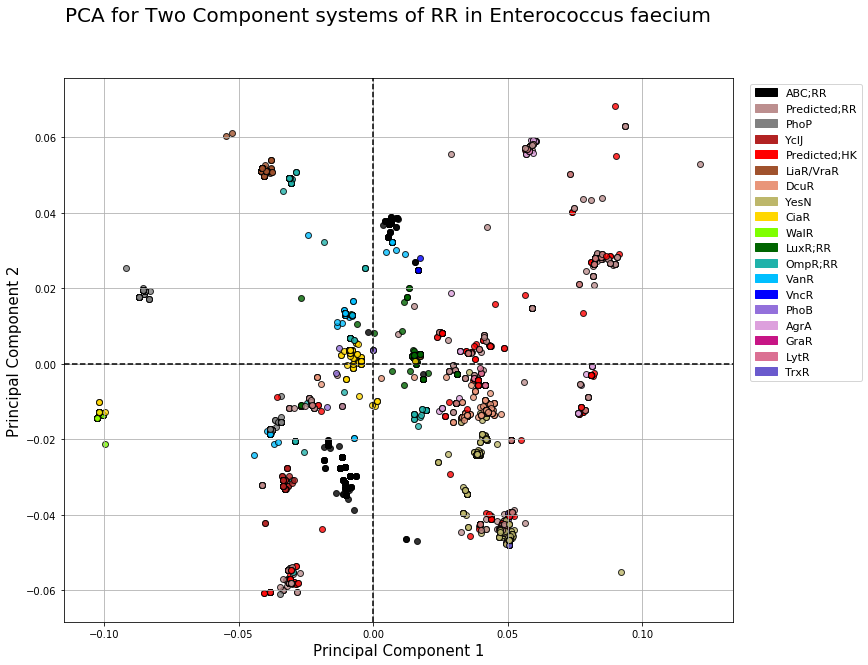

In [20]:
for s in df_weights.index.values:
    split = s.split('|')
    df_weights.loc[s,'Protein'] = split[-2]
    df_weights.loc[s,'TCS'] = split[-1]  
    

color = dict(zip(df_weights['TCS'].unique(),['black', 'rosybrown', 'gray', 'firebrick', 'red', 'sienna', 'darksalmon', 'darkkhaki', 'gold', 'chartreuse', 'darkgreen', 'lightseagreen', 'deepskyblue', 'blue', 'mediumpurple', 'plum', 'mediumvioletred', 'palevioletred', 'slateblue']))


tcs_unique = df_weights['TCS'].unique()

#plot PC1 and PC2
fig,ax = plt.subplots(figsize=(12,10))
fig.suptitle('PCA for Two Component systems of RR in Enterococcus faecium', fontsize=20)
ax.grid(True)
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=0, color='k', linestyle='--')
for i, axis in df_weights.iterrows():
    protein = i.split('|')[-2]
    tcs = i.split('|')[-1]
    #tcs_unique =tcs.unique()
    ax.scatter(axis[0],axis[1],alpha=0.8,c=color[tcs], edgecolors='k')
    
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)


col_legend = []
for i in color:
    col_legend.append(mpatches.Patch(color=color[i], label=i))

#plt.legend( handles=col_legend,loc="best", fontsize=11)
plt.legend( handles=col_legend,bbox_to_anchor=(1.2,1.0), fontsize=11)

### Plot 3D-PCA curve

In [21]:
from mpl_toolkits.mplot3d import Axes3D

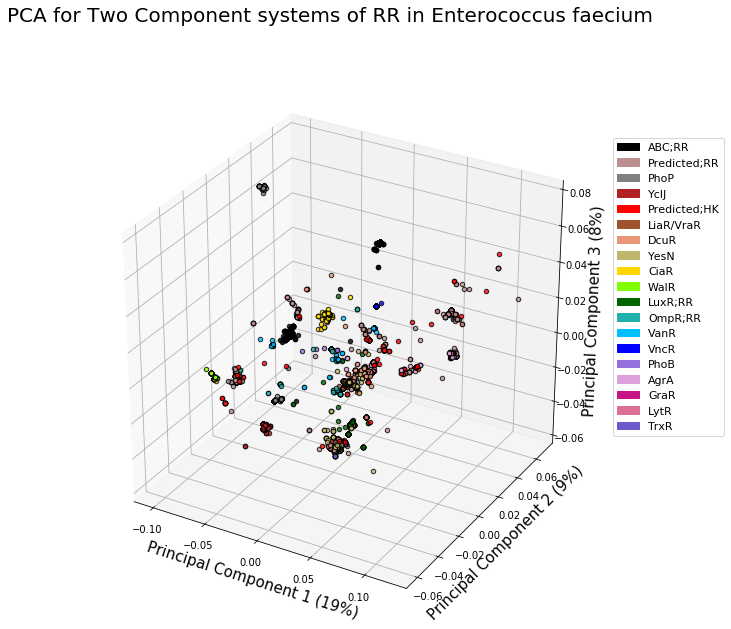

In [22]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('PCA for Two Component systems of RR in Enterococcus faecium', fontsize=20)
ax = plt.axes(projection='3d')
for i, axis in df_weights.iterrows():
    protein = i.split('|')[-2]
    tcs = i.split('|')[-1]
    #tcs_unique =tcs.unique()
    ax.scatter3D(axis[0],axis[1], axis[2],alpha=0.8,c=color[tcs], edgecolors='k')
    
ax.set_xlabel('Principal Component 1 (%d%%)'%round(pca.explained_variance_ratio_[0]*100), fontsize=15)
ax.set_ylabel('Principal Component 2 (%d%%)'%round(pca.explained_variance_ratio_[1]*100), fontsize=15)
ax.set_zlabel('Principal Component 3 (%d%%)'%round(pca.explained_variance_ratio_[2]*100), fontsize=15)

col_legend = []
for i in color:
    col_legend.append(mpatches.Patch(color=color[i], label=i))

#plt.legend( handles=col_legend,loc=0, fontsize=11)
plt.legend( handles=col_legend, bbox_to_anchor=(1.2,0.9), fontsize=11)
